In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [59]:
# Generate samples from a 2-dimensional Gaussian distribution
num_samples = 1000
mu = np.array([2.0, -3.0])
Sigma = np.array([[1.0, 0.7],
                  [0.7, 1.0]])
X = np.random.multivariate_normal(mu, Sigma, num_samples)

In [60]:
def multivariate_normal_pdf(X, mu, Sigma):
    D = X.shape[1]
    norm_const = np.power(2.0*np.pi, -0.5*D)
    det_term = np.power(np.linalg.det(Sigma), -0.5)
    cov_inv = np.linalg.inv(Sigma)
    exp_term = np.exp(-0.5*np.matmul(X-mu, np.matmul(cov_inv, np.transpose(X-mu))))
    pdf = norm_const*det_term*exp_term
    return np.diag(pdf)

In [64]:
density = multivariate_normal_pdf(X, mu, Sigma)
density_scipy = multivariate_normal.pdf(X, mu, Sigma)
error = density - density_scipy
print('Maximum error: %e' % (error.max()))

Maximum error: 4.163336e-17


Text(0, 0.5, '$x_2$')

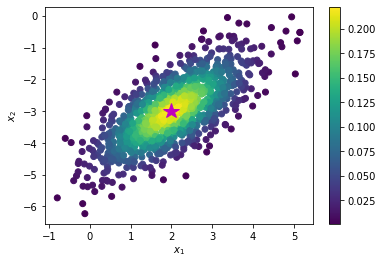

In [63]:
# Plot samples colored by their density
plt.figure()
plt.scatter(X[:,0], X[:,1], c = density)
plt.colorbar()
plt.plot(mu[0], mu[1], 'm*', ms = 16)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')